In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/deep_learning/dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: dataset/lateblight/l262.png  
 extracting: dataset/lateblight/l263.png  
 extracting: dataset/lateblight/l264.png  
 extracting: dataset/lateblight/l265.png  
 extracting: dataset/lateblight/l266.png  
 extracting: dataset/lateblight/l267.png  
 extracting: dataset/lateblight/l268.png  
 extracting: dataset/lateblight/l269.png  
 extracting: dataset/lateblight/l27.png  
 extracting: dataset/lateblight/l270.png  
 extracting: dataset/lateblight/l271.png  
 extracting: dataset/lateblight/l272.png  
 extracting: dataset/lateblight/l273.png  
 extracting: dataset/lateblight/l274.png  
 extracting: dataset/lateblight/l275.png  
  inflating: dataset/lateblight/l276.png  
  inflating: dataset/lateblight/l277.png  
 extracting: dataset/lateblight/l278.png  
 extracting: dataset/lateblight/l279.png  
 extracting: dataset/lateblight/l28.png  
  inflating: dataset/lateblight/l280.png  
  inflating: dataset/lateblight/l281.png  
  inf

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf


from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
SIZE = 128  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 
for directory_path in glob.glob("dataset/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")) or glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        if img_path == "dataset/healthy/h196.png" or img_path=="dataset/yellowcurved/y2110.jpg":
          continue
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label[8:])


Streaming output truncated to the last 5000 lines.
dataset/bacterialSpot/b566.jpg
dataset/bacterialSpot/b431.jpg
dataset/bacterialSpot/b30.jpg
dataset/bacterialSpot/b369.jpg
dataset/bacterialSpot/b579.jpg
dataset/bacterialSpot/b469.jpg
dataset/bacterialSpot/b46.jpg
dataset/bacterialSpot/b275.jpg
dataset/bacterialSpot/b49.jpg
dataset/bacterialSpot/b337.jpg
dataset/bacterialSpot/b144.jpg
dataset/bacterialSpot/b224.jpg
dataset/bacterialSpot/b117.jpg
dataset/bacterialSpot/b380.jpg
dataset/bacterialSpot/b184.jpg
dataset/bacterialSpot/b395.jpg
dataset/bacterialSpot/b151.jpg
dataset/bacterialSpot/b586.jpg
dataset/bacterialSpot/b454.jpg
dataset/bacterialSpot/b354.jpg
dataset/bacterialSpot/b214.jpg
dataset/bacterialSpot/b328.jpg
dataset/bacterialSpot/b553.jpg
dataset/bacterialSpot/b177.jpg
dataset/bacterialSpot/b69.jpg
dataset/bacterialSpot/b542.jpg
dataset/bacterialSpot/b325.jpg
dataset/bacterialSpot/b191.jpg
dataset/bacterialSpot/b183.jpg
dataset/bacterialSpot/b150.jpg
dataset/bacterialSpot/b

In [ ]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_labels

array(['tomato_mosaic', 'tomato_mosaic', 'tomato_mosaic', ..., 'Healthy',
       'Healthy', 'Healthy'], dtype='<U16')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (train_labels)
#print (y)

y=y.reshape(-1,1)
# print(y.shape, type(y))
onehotencoder = OneHotEncoder(sparse=False)  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
train_labels_encoded= onehotencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(train_images,train_labels_encoded, test_size = 0.2, random_state = 42)
train_labels_encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

from tensorflow.keras.applications.inception_v3 import InceptionV3

#############################
#Load model wothout classifier/fully connected layers
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))



87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
# Freeze four convolution blocks
for layer in model.layers:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:
x = model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x) 
transfer_model = Model(inputs=model.input, outputs=x)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 0.00001
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate), metrics=["accuracy"])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab_Notebooks/checkpoint1',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = transfer_model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data=(x_test,y_test), callbacks=[model_checkpoint_callback]) 

Epoch 1/20
160/160 [==============================] - 24s 73ms/step - loss: 0.7698 - accuracy: 0.7510 - val_loss: 0.5072 - val_accuracy: 0.8296
Epoch 2/20
160/160 [==============================] - 7s 43ms/step - loss: 0.3398 - accuracy: 0.8898 - val_loss: 0.3875 - val_accuracy: 0.8694
Epoch 3/20
160/160 [==============================] - 7s 42ms/step - loss: 0.2293 - accuracy: 0.9326 - val_loss: 0.3227 - val_accuracy: 0.8851
Epoch 4/20
160/160 [==============================] - 7s 42ms/step - loss: 0.1689 - accuracy: 0.9541 - val_loss: 0.2926 - val_accuracy: 0.8984
Epoch 5/20
160/160 [==============================] - 7s 45ms/step - loss: 0.1303 - accuracy: 0.9660 - val_loss: 0.2871 - val_accuracy: 0.8960
Epoch 6/20
160/160 [==============================] - 8s 53ms/step - loss: 0.1066 - accuracy: 0.9754 - val_loss: 0.2707 - val_accuracy: 0.9015
Epoch 7/20
160/160 [==============================] - 7s 42ms/step - loss: 0.0863 - accuracy: 0.9824 - val_loss: 0.2620 - val_accuracy: 0.909

In [ ]:
transfer_model.load_weights('/content/drive/MyDrive/Colab_Notebooks/checkpoint1')
preds = transfer_model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]/10))
print ("Test Accuracy = " + str(preds[1]*100)+"%")

40/40 [==============================] - 2s 35ms/step - loss: 0.2437 - accuracy: 0.9226
Loss = 0.024369731545448303
Test Accuracy = 92.25957989692688%


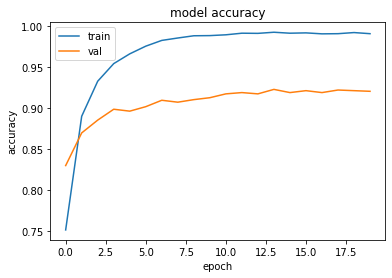

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
SIZE=128
inception_model=InceptionV3(input_shape=(SIZE,SIZE,3),include_top=False,weights='imagenet')
# Freeze four convolution blocks
for layer in inception_model.layers:
  if layer.name[:19]=="batch_normalization":
    layer.trainable = False


In [ ]:
x = inception_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x) # Softmax for multiclass
transfer_model = Model(inputs=inception_model.input, outputs=x)
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 True
1 conv2d_94 True
2 batch_normalization_94 False
3 activation_94 True
4 conv2d_95 True
5 batch_normalization_95 False
6 activation_95 True
7 conv2d_96 True
8 batch_normalization_96 False
9 activation_96 True
10 max_pooling2d_4 True
11 conv2d_97 True
12 batch_normalization_97 False
13 activation_97 True
14 conv2d_98 True
15 batch_normalization_98 False
16 activation_98 True
17 max_pooling2d_5 True
18 conv2d_102 True
19 batch_normalization_102 False
20 activation_102 True
21 conv2d_100 True
22 conv2d_103 True
23 batch_normalization_100 False
24 batch_normalization_103 False
25 activation_100 True
26 activation_103 True
27 average_pooling2d_9 True
28 conv2d_99 True
29 conv2d_101 True
30 conv2d_104 True
31 conv2d_105 True
32 batch_normalization_99 False
33 batch_normalization_101 False
34 batch_normalization_104 False
35 batch_normalization_105 False
36 activation_99 True
37 activation_101 True
38 activation_104 True
39 activation_105 True
40 mixed0 True
41 conv2d_109 True
42

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 0.00001
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate), metrics=["accuracy"])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab_Notebooks/checkpoint1',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = transfer_model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data=(x_test,y_test), callbacks=[model_checkpoint_callback]) 

Epoch 1/20
160/160 [==============================] - 29s 131ms/step - loss: 0.5080 - accuracy: 0.8411 - val_loss: 0.1645 - val_accuracy: 0.9484
Epoch 2/20
160/160 [==============================] - 19s 117ms/step - loss: 0.0854 - accuracy: 0.9750 - val_loss: 0.1269 - val_accuracy: 0.9539
Epoch 3/20
160/160 [==============================] - 19s 118ms/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.0938 - val_accuracy: 0.9687
Epoch 4/20
160/160 [==============================] - 19s 116ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0809 - val_accuracy: 0.9726
Epoch 5/20
160/160 [==============================] - 19s 117ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0748 - val_accuracy: 0.9742
Epoch 6/20
160/160 [==============================] - 19s 118ms/step - loss: 0.0227 - accuracy: 0.9916 - val_loss: 0.0726 - val_accuracy: 0.9750
Epoch 7/20
160/160 [==============================] - 17s 109ms/step - loss: 0.0218 - accuracy: 0.9906 - val_loss: 0.0823 - val_ac

In [ ]:
transfer_model.load_weights('/content/drive/MyDrive/Colab_Notebooks/checkpoint1')
preds = transfer_model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy% = " + str(preds[1]*100))

40/40 [==============================] - 1s 34ms/step - loss: 0.0530 - accuracy: 0.9851
Loss = 0.05302239581942558
Test Accuracy% = 98.51446151733398


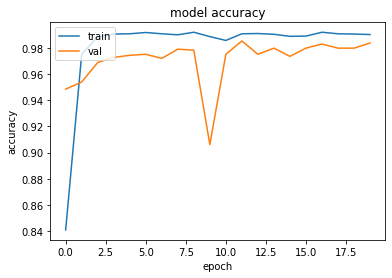

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

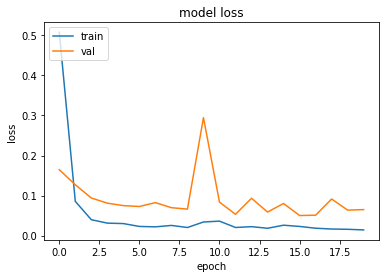

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
p = transfer_model.predict([x_test])

40/40 [==============================] - 3s 28ms/step


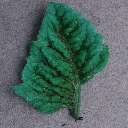

actual output : 7
prediction : 7


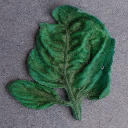

actual output : 7
prediction : 7


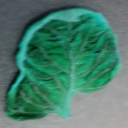

actual output : 7
prediction : 7


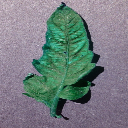

actual output : 6
prediction : 6


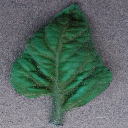

actual output : 7
prediction : 7


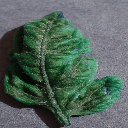

actual output : 7
prediction : 7


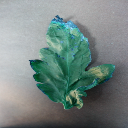

actual output : 1
prediction : 1


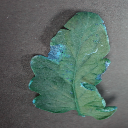

actual output : 1
prediction : 1


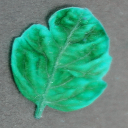

actual output : 7
prediction : 7


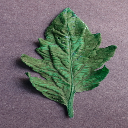

actual output : 6
prediction : 6


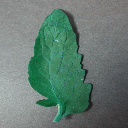

actual output : 1
prediction : 1


In [ ]:
for i in range(50,61):
  cv2_imshow(x_test[i]*255.0)
  print('actual output : '+ str(np.argmax(y_test[i])))
  print('prediction : '+ str(np.argmax(p[i])))